In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime, timedelta, time
import random

In [33]:
df = pd.read_csv(r'../dataset/dimensions/dim_orders.csv')

In [60]:
df['platform_id'] = df['platform_id'].replace({1:'JioMart',2:'Blinkit',3:'Swiggy Instamart'})

In [61]:
df = df.rename(columns={'platform_id':'platform_name'})

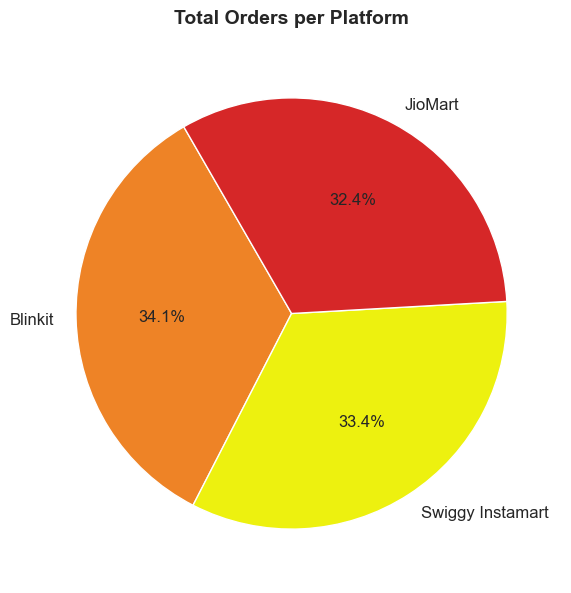

In [36]:
colors = ["#ee8326", "#edf10f", "#d62728"]  # same colors as bars

# Count orders per platform
platform_counts = df['platform_name'].value_counts()

plt.figure(figsize=(7,7))

plt.pie(
    platform_counts, 
    labels=platform_counts.index,       # category names
    autopct='%1.1f%%',                  # percentage with 1 decimal
    startangle=120,                     # rotate start
    colors=colors,                      # custom colors
    wedgeprops={'edgecolor':'white'},   # clean white borders
    textprops={'fontsize':12}           # label font size
)

plt.title("Total Orders per Platform", fontsize=14, weight='bold', pad=15)
plt.show()


In [56]:
temp = pd.DataFrame(df['product_category_id'].replace({1:'Dairy',2:'Grocery',3:'Snacks',4:'Fruits & Vegetables',5:'Beverages',6:'Personal Care'}))

C:\Users\danis\AppData\Local\Temp\ipykernel_10180\3807995302.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data = temp, x='product_category_id', palette='viridis')


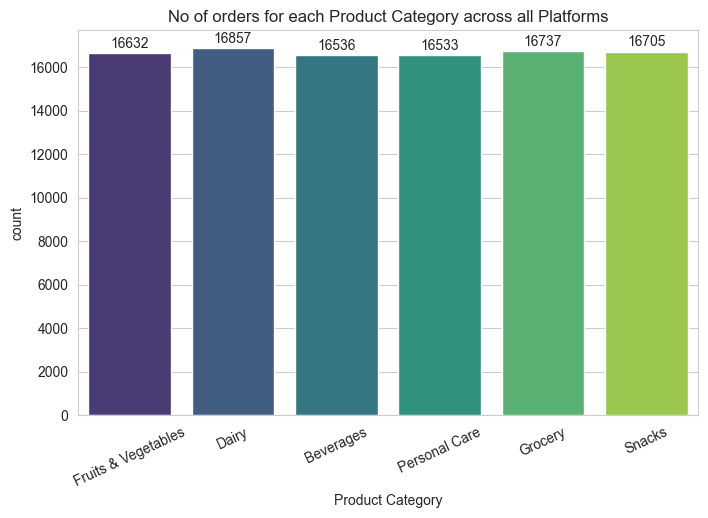

In [ ]:
plt.figure(figsize=(8,5))
sns.set_style('whitegrid')

ax = sns.countplot(data = temp, x='product_category_id', palette='viridis')

for cont in ax.containers:
    ax.bar_label(cont,fmt='%d',padding=2)

ax.set_xlabel('Product Category')
ax.set_ylabel;('No of Orders')
ax.set_title('No of orders for each Product Category across all Platforms')

plt.xticks(rotation=25,fontsize=10)

plt.show()




In [67]:
Order_Sum = round(df['order_value_inr'].sum())
print(f"Total Sum Orders Amount across all platform is: ₹{Order_Sum}")

print()

Order_Sum_platform = df.groupby('platform_name')['order_value_inr'].sum().round()
print(f"Total Sum Orders Amount for each platform is")
for platform , value in Order_Sum_platform.items():
    print(f"{platform}: ₹{value}")

print()

Order_Avg = round(df['order_value_inr'].mean())
print(f"Average of total Orders Amount across all platform is: ₹{Order_Avg}")

print()


Order_Avg_platform = df.groupby('platform_name')['order_value_inr'].mean().round()
print(f"Average Order amount for each platfrom:")
for platform, value in Order_Avg_platform.items():
    print(f"{platform}: ₹{value}")


print()

Order_max_platform = df.groupby('platform_name')['order_value_inr'].max().round()
print(f"Max Order amount for each platfrom:")
for platform, value in Order_max_platform.items():
    print(f"{platform}: ₹{value}")

print()

Order_min_platform = df.groupby('platform_name')['order_value_inr'].min().round()
print(f"Minimum Order amount for each platfrom:")
for platform, value in Order_min_platform.items():
    print(f"{platform}: ₹{value}")




Total Sum Orders Amount across all platform is: ₹59225643

Total Sum Orders Amount for each platform is
Blinkit: ₹19856117
JioMart: ₹19551516
Swiggy Instamart: ₹19818010

Average of total Orders Amount across all platform is: ₹592

Average Order amount for each platfrom:
Blinkit: ₹594.0
JioMart: ₹590.0
Swiggy Instamart: ₹592.0

Max Order amount for each platfrom:
Blinkit: ₹5445
JioMart: ₹2000
Swiggy Instamart: ₹1996

Minimum Order amount for each platfrom:
Blinkit: ₹20
JioMart: ₹22
Swiggy Instamart: ₹50


In [70]:
Delivery_Avg = round(df['delivery_time_min'].mean())
print(f"Average Delivery time across all platform is: {Delivery_Avg}min")

print()

Avg_Delivery = df.groupby('platform_name')['delivery_time_min'].mean().round()
print(f"Average delivery time for each platform is:")
for platform, value in Avg_Delivery.items():
    print(f"{platform}: {value}min")

print()


Fastest_Delivery = df.groupby('platform_name')['delivery_time_min'].min()
print(f"Fastest delivery time for each platform is:")
for platform, value in Fastest_Delivery.items():
    print(f"{platform}: {value}min")


print()

Slowest_Delivery = df.groupby('platform_name')['delivery_time_min'].max()
print(f"Slowest delivery time fro each platform is:")
for platform, value in Slowest_Delivery.items():
    print(f"{platform}: {value}min")






Average Delivery time across all platform is: 14min

Average delivery time for each platform is:
Blinkit: 13.0min
JioMart: 18.0min
Swiggy Instamart: 12.0min

Fastest delivery time for each platform is:
Blinkit: 5.0min
JioMart: 5.0min
Swiggy Instamart: 4.0min

Slowest delivery time fro each platform is:
Blinkit: 76.0min
JioMart: 73.0min
Swiggy Instamart: 45.0min


In [64]:
def random_datetime():
    start_date = datetime(2025,3,1)
    end_date = datetime(2025,3,12)

    random_days = random.randint(0,(end_date-start_date).days)

    date = start_date + timedelta(days=random_days)

    while True:
        hour = random.randint(0,3)
        minute = random.randint(0,59)

        if not (3 <= hour < 5):
            break
    
    dt = datetime.combine(date,time(hour,minute))
    return dt

df['order_datetime'] = [random_datetime() for _ in range(len(df))]




In [68]:
df.to_csv(r'../dataset/cleaned_orders.csv',index=False)

In [26]:
df = pd.read_csv(r'../dataset/cleaned_orders.csv')

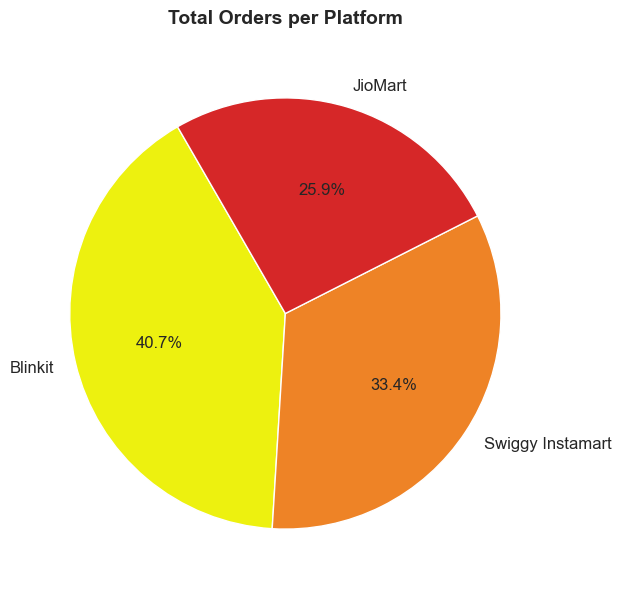

In [95]:
colors = ["#edf10f",  "#ee8326" , "#d62728"]  # same colors as bars

# Count orders per platform
platform_counts = df['platform_name'].value_counts()

plt.figure(figsize=(7,7))

plt.pie(
    platform_counts, 
    labels=platform_counts.index,       # category names
    autopct='%1.1f%%',                  # percentage with 1 decimal
    startangle=120,                     # rotate start
    colors=colors,                      # custom colors
    wedgeprops={'edgecolor':'white'},   # clean white borders
    textprops={'fontsize':12}           # label font size
)

plt.title("Total Orders per Platform", fontsize=14, weight='bold', pad=15)
plt.show()


In [100]:
Order_Sum = round(df['order_value_inr'].sum())
print(f"Total Sum Orders Amount across all platform is: ₹{Order_Sum}")

print()

Order_Sum_platform = df.groupby('platform_name')['order_value_inr'].sum().round()
print(f"Total Sum Orders Amount for each platform is")
for platform , value in Order_Sum_platform.items():
    print(f"{platform}: ₹{value}")

print()

Order_Avg = round(df['order_value_inr'].mean())
print(f"Average of total Orders Amount across all platform is: ₹{Order_Avg}")

print()


Order_Avg_platform = df.groupby('platform_name')['order_value_inr'].mean().round()
print(f"Average Order amount for each platfrom:")
for platform, value in Order_Avg_platform.items():
    print(f"{platform}: ₹{value}")


print()

Order_max_platform = df.groupby('platform_name')['order_value_inr'].max().round()
print(f"Max Order amount for each platfrom:")
for platform, value in Order_max_platform.items():
    print(f"{platform}: ₹{value}")

print()

Order_min_platform = df.groupby('platform_name')['order_value_inr'].min().round()
print(f"Minimum Order amount for each platfrom:")
for platform, value in Order_min_platform.items():
    print(f"{platform}: ₹{value}")




Total Sum Orders Amount across all platform is: ₹42995536

Total Sum Orders Amount for each platform is
Blinkit: ₹17444570
JioMart: ₹11663443
Swiggy Instamart: ₹13887523

Average of total Orders Amount across all platform is: ₹430

Average Order amount for each platfrom:
Blinkit: ₹429.0
JioMart: ₹451.0
Swiggy Instamart: ₹415.0

Max Order amount for each platfrom:
Blinkit: ₹5445
JioMart: ₹2999
Swiggy Instamart: ₹1996

Minimum Order amount for each platfrom:
Blinkit: ₹19
JioMart: ₹22
Swiggy Instamart: ₹30


In [101]:
Delivery_Avg = round(df['delivery_time_min'].mean())
print(f"Average Delivery time across all platform is: {Delivery_Avg}min")

print()

Avg_Delivery = df.groupby('platform_name')['delivery_time_min'].mean().round()
print(f"Average delivery time for each platform is:")
for platform, value in Avg_Delivery.items():
    print(f"{platform}: {value}min")

print()


Fastest_Delivery = df.groupby('platform_name')['delivery_time_min'].min()
print(f"Fastest delivery time for each platform is:")
for platform, value in Fastest_Delivery.items():
    print(f"{platform}: {value}min")


print()

Slowest_Delivery = df.groupby('platform_name')['delivery_time_min'].max()
print(f"Slowest delivery time fro each platform is:")
for platform, value in Slowest_Delivery.items():
    print(f"{platform}: {value}min")






Average Delivery time across all platform is: 14min

Average delivery time for each platform is:
Blinkit: 14.0min
JioMart: 18.0min
Swiggy Instamart: 12.0min

Fastest delivery time for each platform is:
Blinkit: 5.0min
JioMart: 5.0min
Swiggy Instamart: 4.0min

Slowest delivery time fro each platform is:
Blinkit: 76.0min
JioMart: 73.0min
Swiggy Instamart: 45.0min


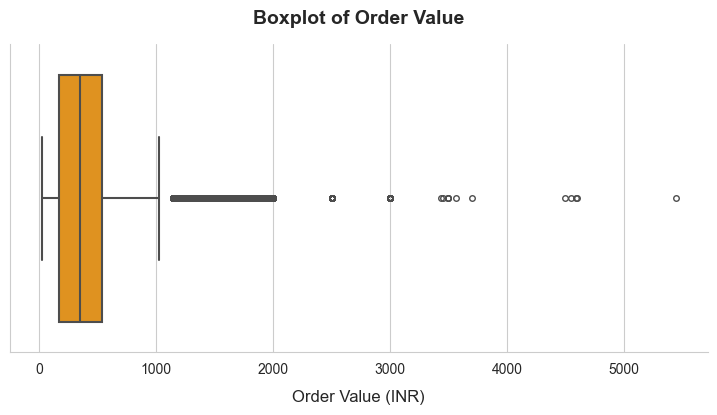

In [102]:
plt.figure(figsize=(9,4))
sns.set_style("whitegrid")

ax = sns.boxplot(
    x=df['order_value_inr'], 
    color="#FF9800",          # nicer orange shade
    linewidth=1.5,            # thicker border
    fliersize=4               # size of outlier dots
)

# Labels & title
ax.set_title("Boxplot of Order Value", fontsize=14, weight='bold', pad=15)
ax.set_xlabel("Order Value (INR)", fontsize=12, labelpad=10)

# Remove top & right spines for cleaner look
sns.despine()

plt.show()


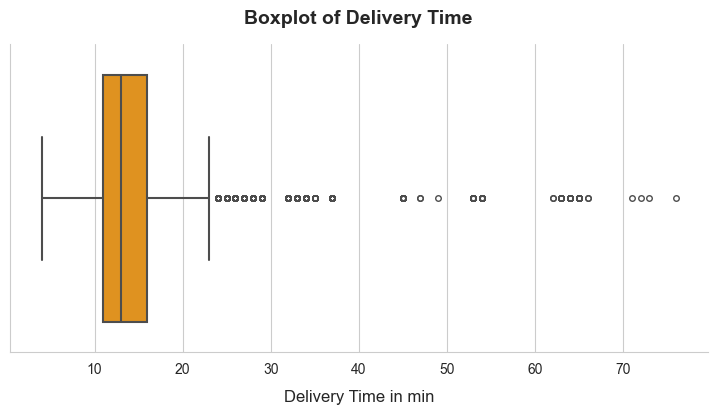

In [103]:
plt.figure(figsize=(9,4))
sns.set_style("whitegrid")

ax = sns.boxplot(
    x=df['delivery_time_min'], 
    color="#FF9800",          # nicer orange shade
    linewidth=1.5,            # thicker border
    fliersize=4               # size of outlier dots
)

# Labels & title
ax.set_title("Boxplot of Delivery Time", fontsize=14, weight='bold', pad=15)
ax.set_xlabel("Delivery Time in min", fontsize=12, labelpad=10)

# Remove top & right spines for cleaner look
sns.despine()

plt.show()


C:\Users\danis\AppData\Local\Temp\ipykernel_22476\4072866313.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


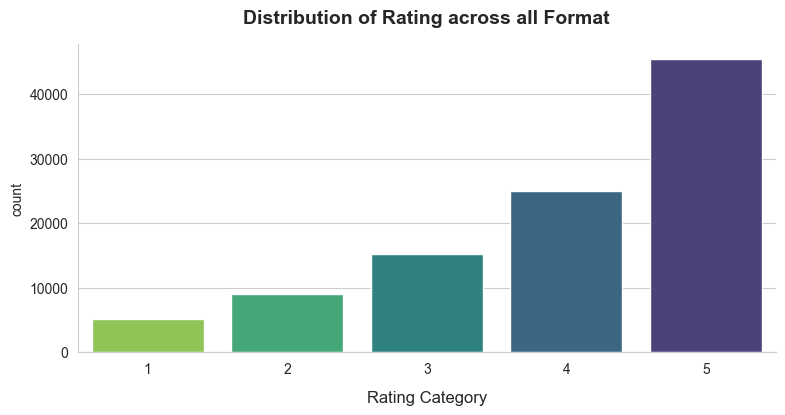

In [27]:
plt.figure(figsize=(9,4))
sns.set_style("whitegrid")

ax = sns.countplot(
    x=df['service_rating'],
    palette = 'viridis_r'
)

# Labels & title
ax.set_title("Distribution of Rating across all Format", fontsize=14, weight='bold', pad=15)
ax.set_xlabel("Rating Category", fontsize=12, labelpad=10)

# Remove top & right spines for cleaner look
sns.despine()

plt.show()


C:\Users\danis\AppData\Local\Temp\ipykernel_9348\1079615155.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(
C:\Users\danis\AppData\Local\Temp\ipykernel_9348\1079615155.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


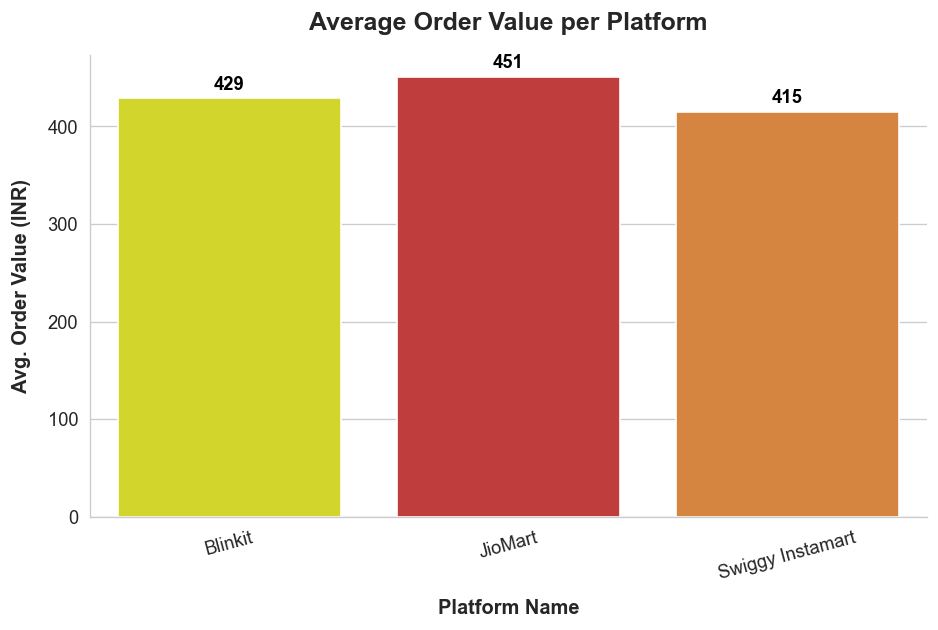

In [106]:
plt.figure(figsize=(9,5), dpi=120)   # dpi=resolution, sharper text & lines
sns.set_style("whitegrid")

ax = sns.barplot(
    data=df,
    x='platform_name',
    y='order_value_inr',
    estimator='mean',
    ci=None,
    palette=["#edf10f","#d62728","#ee8326"]
)

# Labels on bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', padding=3, fontsize=11, weight='bold', color="black")

# Axis labels & title
ax.set_xlabel("Platform Name", fontsize=12, labelpad=10, weight='bold')
ax.set_ylabel("Avg. Order Value (INR)", fontsize=12, labelpad=10, weight='bold')
ax.set_title("Average Order Value per Platform", fontsize=15, weight='bold', pad=15)

# Rotate x-axis labels slightly if names are long
plt.xticks(rotation=15, fontsize=11)
plt.yticks(fontsize=11)

# Remove unnecessary top/right borders
sns.despine()

plt.show()


C:\Users\danis\AppData\Local\Temp\ipykernel_9348\38021502.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(
C:\Users\danis\AppData\Local\Temp\ipykernel_9348\38021502.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


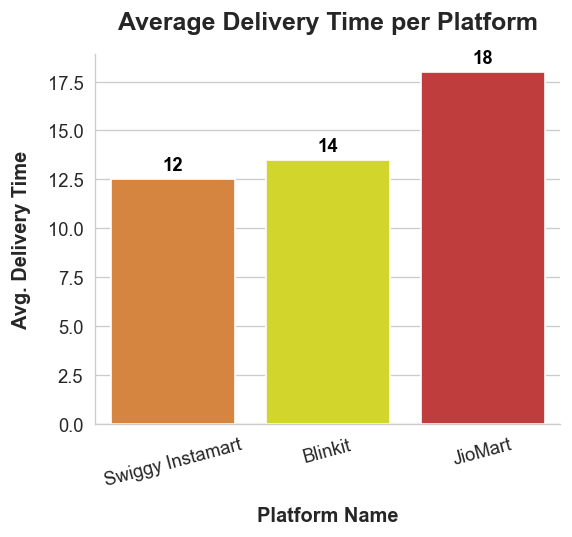

In [107]:
plt.figure(figsize=(5,4),dpi=120)
sns.set_style('whitegrid')

order = df.groupby('platform_name')['delivery_time_min'].mean().sort_values(ascending=True).index

ax = sns.barplot(
    data = df,
    x='platform_name',
    y='delivery_time_min',
    estimator='mean',
    ci=None,
    palette=["#ee8326","#edf10f","#d62728"],
    order=order
)

for container in ax.containers:
    ax.bar_label(container,fmt='%.0f',padding=3, fontsize=11, weight='bold', color="black")

ax.set_xlabel("Platform Name", fontsize=12, labelpad=10, weight='bold')
ax.set_ylabel("Avg. Delivery Time", fontsize=12, labelpad=10, weight='bold')
ax.set_title("Average Deli" \
"very Time per Platform", fontsize=15, weight='bold', pad=15)

# Rotate x-axis labels slightly if names are long
plt.xticks(rotation=15, fontsize=11)
plt.yticks(fontsize=11)

# Remove unnecessary top/right borders
sns.despine()

plt.show()


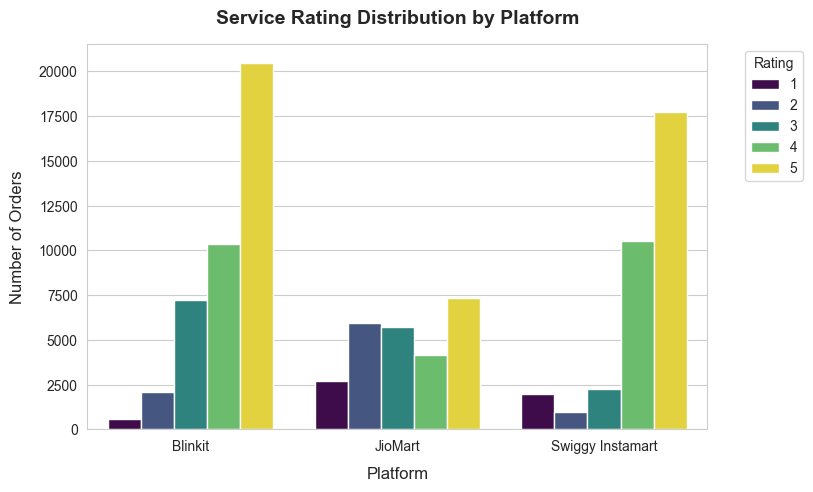

In [28]:
plt.figure(figsize=(8,5))
sns.set_style("whitegrid")

ax = sns.countplot(
    data=df,
    x="platform_name",
    hue="service_rating",   # 1–5 categories
    palette="viridis"
)

# Labels & formatting
ax.set_title("Service Rating Distribution by Platform", fontsize=14, weight="bold", pad=15)
ax.set_xlabel("Platform", fontsize=12, labelpad=10)
ax.set_ylabel("Number of Orders", fontsize=12, labelpad=10)

# Add legend
plt.legend(title="Rating", bbox_to_anchor=(1.05, 1), loc="upper left")

plt.show()


In [29]:
service_per_platform = df.groupby('platform_name')['service_rating'].mean().round()
service_per_platform

platform_name
Blinkit             4.0
JioMart             3.0
Swiggy Instamart    4.0
Name: service_rating, dtype: float64

C:\Users\danis\AppData\Local\Temp\ipykernel_22476\2208846571.py:28: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=15, ha='right')


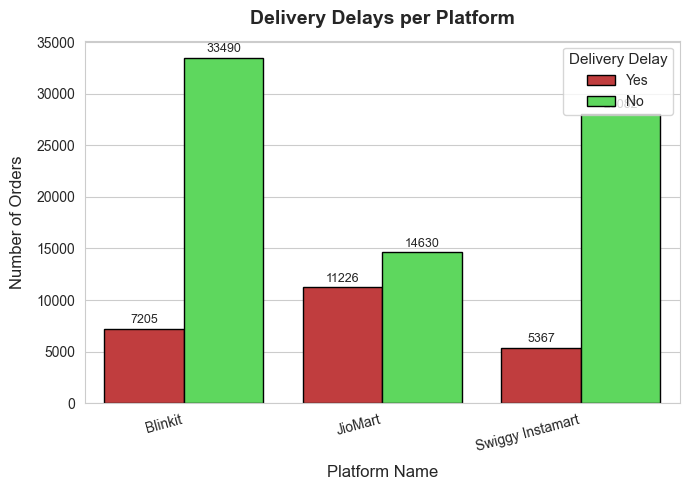

In [31]:
plt.figure(figsize=(7,5))
sns.set_style('whitegrid')

# Custom color palette
colors = ["#d62728","#4aeb4a"]  # green = no delay, red = delay

ax = sns.countplot(
    data=df,
    x='platform_name',
    hue='delivery_delay',
    palette=colors,
    edgecolor="black"
)

# Add counts on top of bars
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=9, padding=2)

# Titles and labels
ax.set_title('Delivery Delays per Platform', fontsize=14, weight='bold', pad=12)
ax.set_xlabel('Platform Name', fontsize=12, labelpad=8)
ax.set_ylabel('Number of Orders', fontsize=12, labelpad=8)

# Legend styling
ax.legend(title="Delivery Delay", fontsize=10, title_fontsize=11, loc='upper right', frameon=True)

# Improve x-labels readability
ax.set_xticklabels(ax.get_xticklabels(), rotation=15, ha='right')

plt.tight_layout()
plt.show()


In [123]:
df.columns

Index(['order_id', 'customer_id', 'platform_name', 'product_category_id',
       'order_datetime', 'delivery_time_min', 'order_value_inr',
       'delivery_delay', 'refund_requested', 'service_rating',
       'customer_feedback'],
      dtype='object')

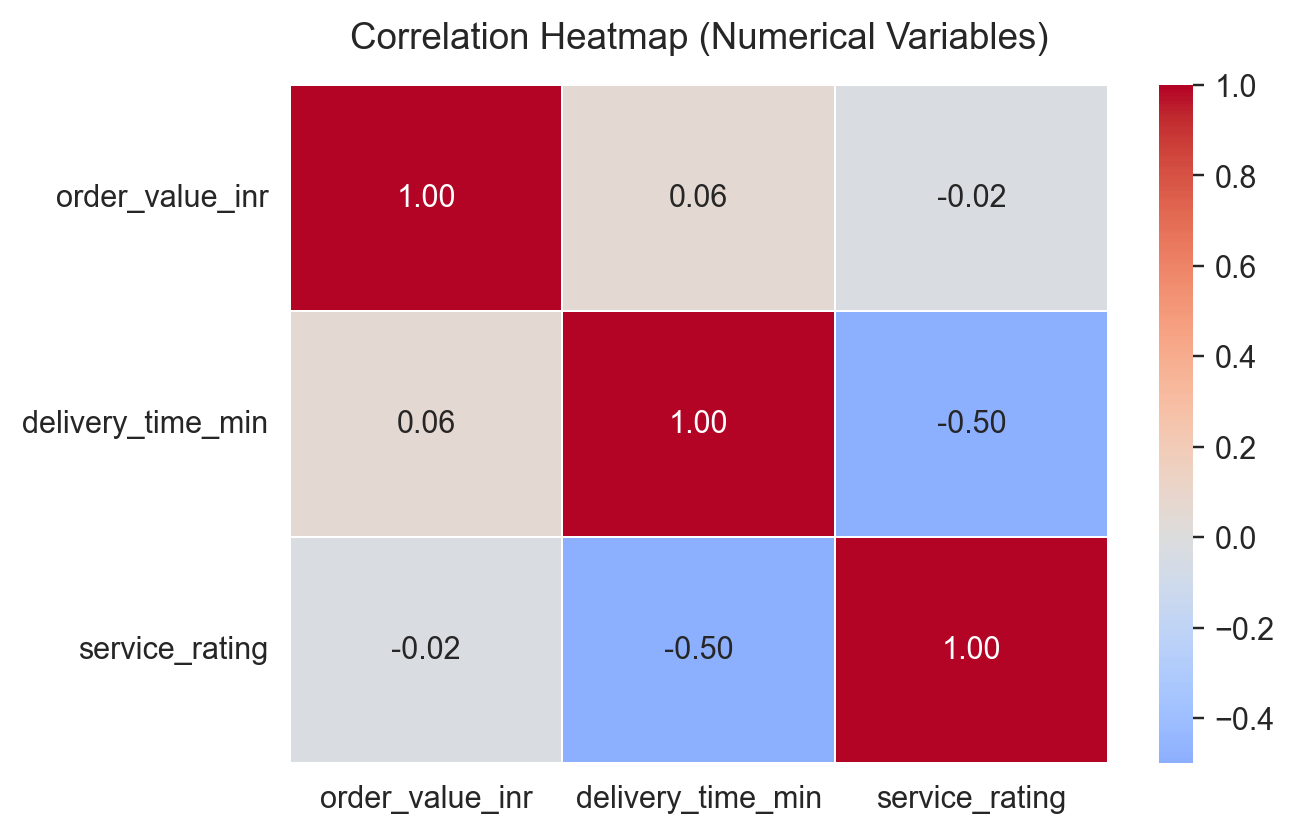

In [32]:
# Select only numerical columns
num_cols = ['order_value_inr', 'delivery_time_min', 'service_rating']
corr = df[num_cols].corr()

plt.figure(figsize=(6,4),dpi=220)
sns.set_style("white")

ax = sns.heatmap(
    corr, 
    annot=True,        # Show correlation values
    cmap='coolwarm',   # Better color contrast
    center=0,          # Center around 0
    linewidths=0.5,    # Add separation lines
    fmt=".2f"          # Round to 2 decimals
)

ax.set_title("Correlation Heatmap (Numerical Variables)", fontsize=12, pad=12)
plt.show()

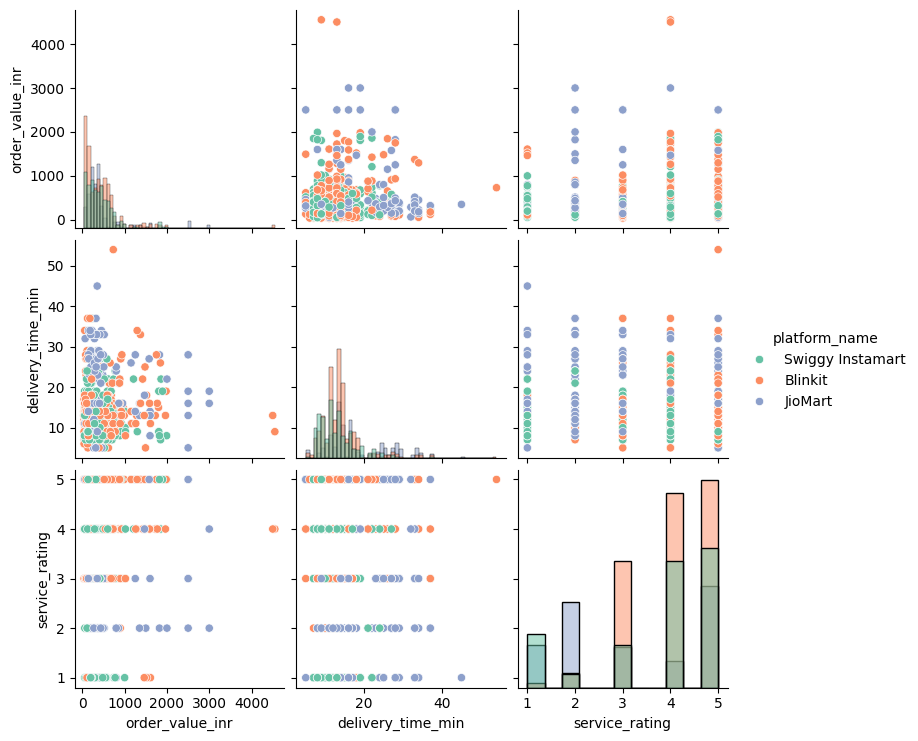

In [7]:


# Select only required numerical columns + hue column
num_cols = ["order_value_inr", "delivery_time_min", "service_rating", "platform_name"]

sample_df = df[num_cols].sample(1000, random_state=42)  # take only 1000 rows
sns.pairplot(sample_df, hue="platform_name", diag_kind="hist", palette="Set2")
plt.show()




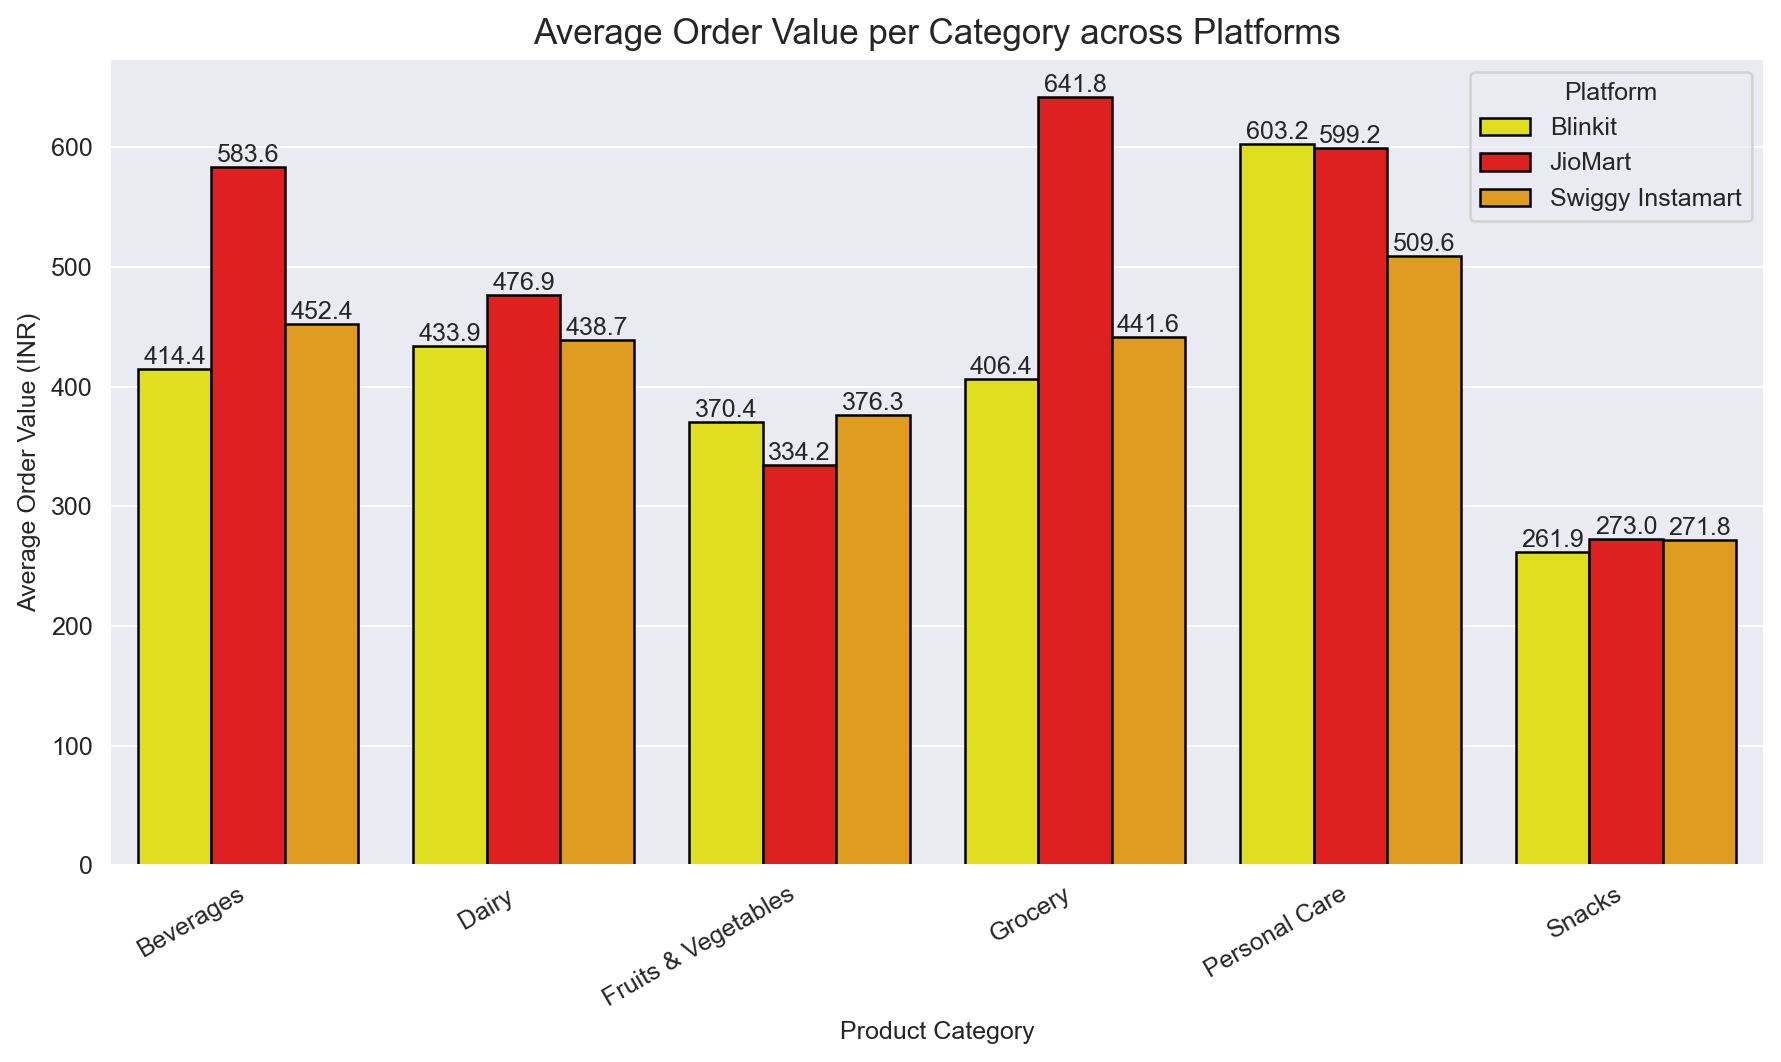

In [17]:


# Mapping numbers → names
product_category_mapping = {
    'Dairy ':1,
    'Grocery':2,
    'Snacks':3,
    'Fruits & Vegetables':4,
    'Beverages':5,
    'Personal Care':6
}

# Reverse mapping (id → name)
id_to_category = {v: k for k, v in product_category_mapping.items()}

# Map product_category_id to names
df["product_category_name"] = df["product_category_id"].map(id_to_category)

# Group and calculate average
avg_order = df.groupby(["platform_name", "product_category_name"])["order_value_inr"].mean().reset_index()

# Plot
plt.figure(figsize=(10,6),dpi=180)
sns.set_style('darkgrid')
ax = sns.barplot(
    data=avg_order,
    x="product_category_name",
    y="order_value_inr",
    hue="platform_name",
    palette={"Blinkit":"yellow", "Swiggy Instamart":"orange", "JioMart":"red"},
    edgecolor='black'
)

for container in ax.containers:
    ax.bar_label(container,fmt='%.1f')

plt.xticks(rotation=30, ha="right")
plt.title("Average Order Value per Category across Platforms", fontsize=14)
plt.xlabel("Product Category")
plt.ylabel("Average Order Value (INR)")
plt.legend(title="Platform")
plt.tight_layout()
plt.show()


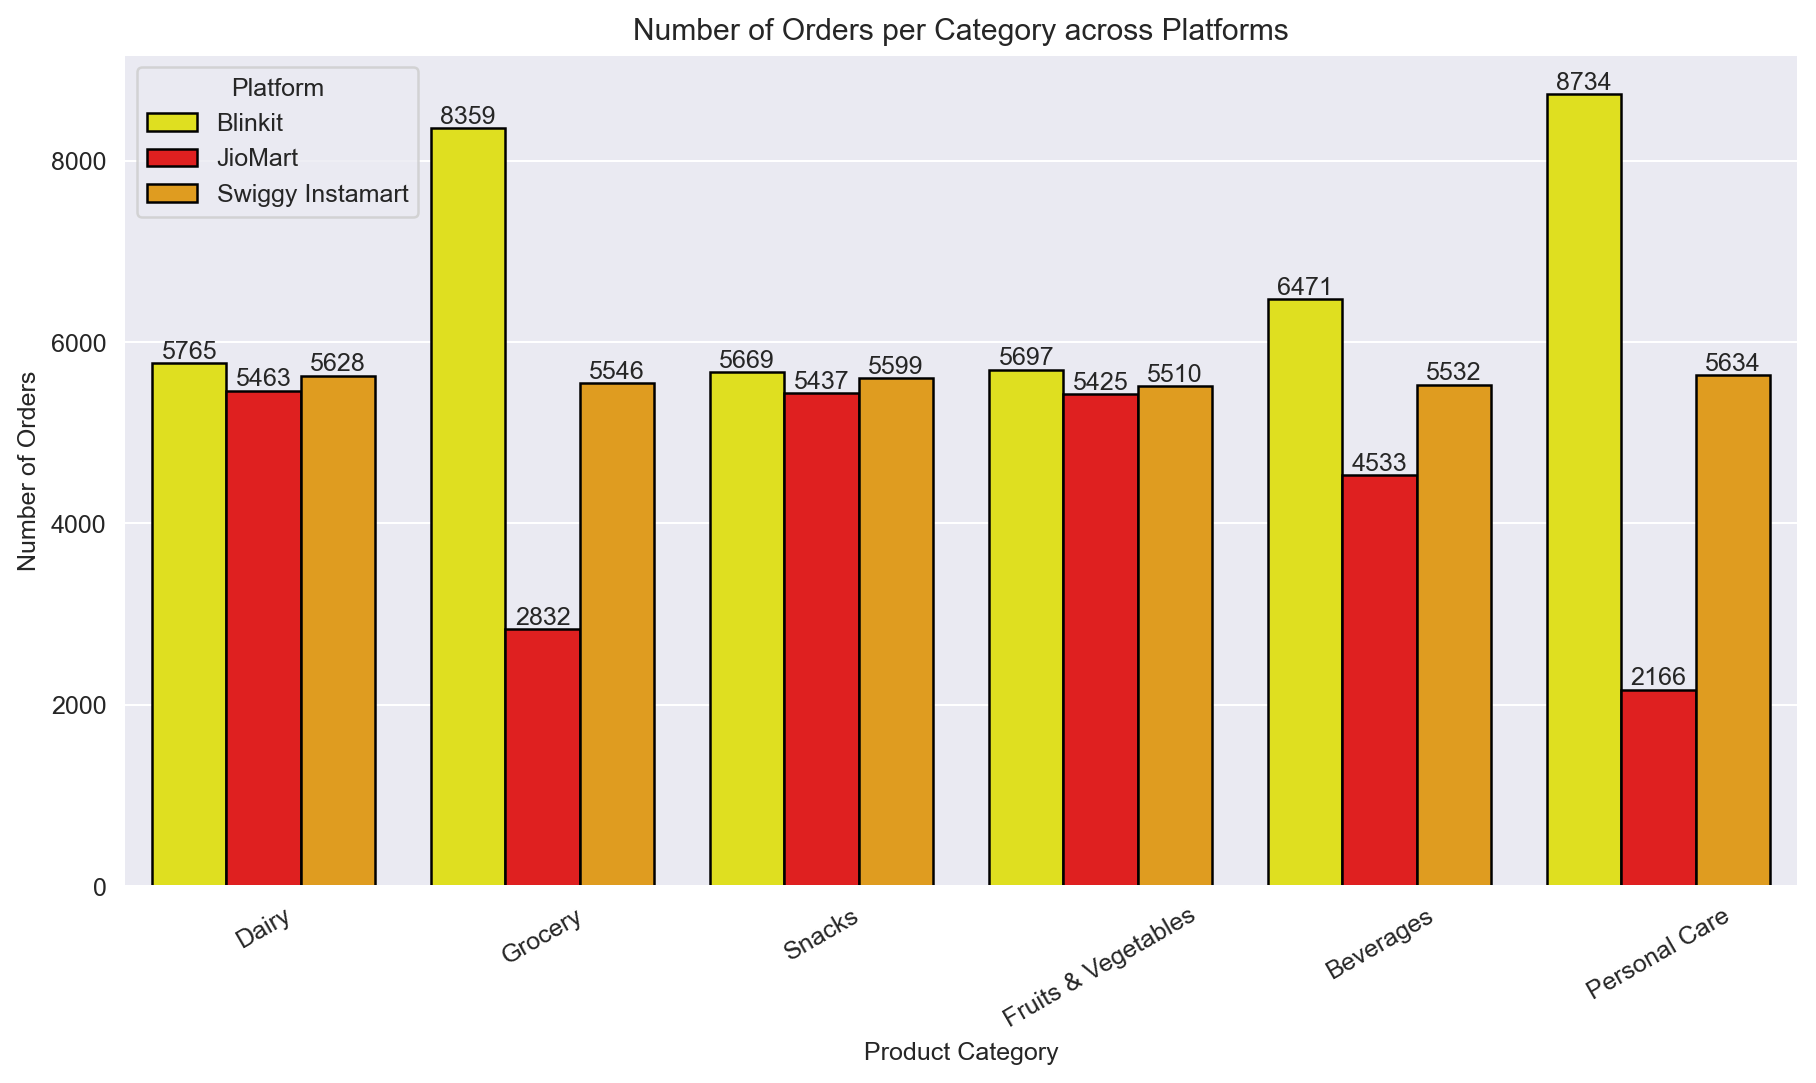

In [23]:


# Mapping for product categories
product_category_mapping = {
    1:'Dairy',
    2:'Grocery',
    3:'Snacks',
    4:'Fruits & Vegetables',
    5:'Beverages',
    6:'Personal Care'
}

# Group data by platform & category and count orders
orders_count = df.groupby(['platform_name', 'product_category_id'])['order_id'].count().reset_index()

# Map category names
orders_count['product_category_id'] = orders_count['product_category_id'].map(product_category_mapping)

# Plot
plt.figure(figsize=(12,6),dpi=180)
sns.set_style('darkgrid')
ax = sns.barplot(
    data=orders_count,
    x='product_category_id',
    y='order_id',
    hue='platform_name',
    palette={'Blinkit':'yellow', 'JioMart':'red', 'Swiggy Instamart':'orange'},
    edgecolor='black'
)

for container in ax.containers:
    ax.bar_label(container,fmt='%.0f')

plt.title("Number of Orders per Category across Platforms")
plt.xlabel("Product Category")
plt.ylabel("Number of Orders")
plt.xticks(rotation=30)
plt.legend(title="Platform")
plt.show()


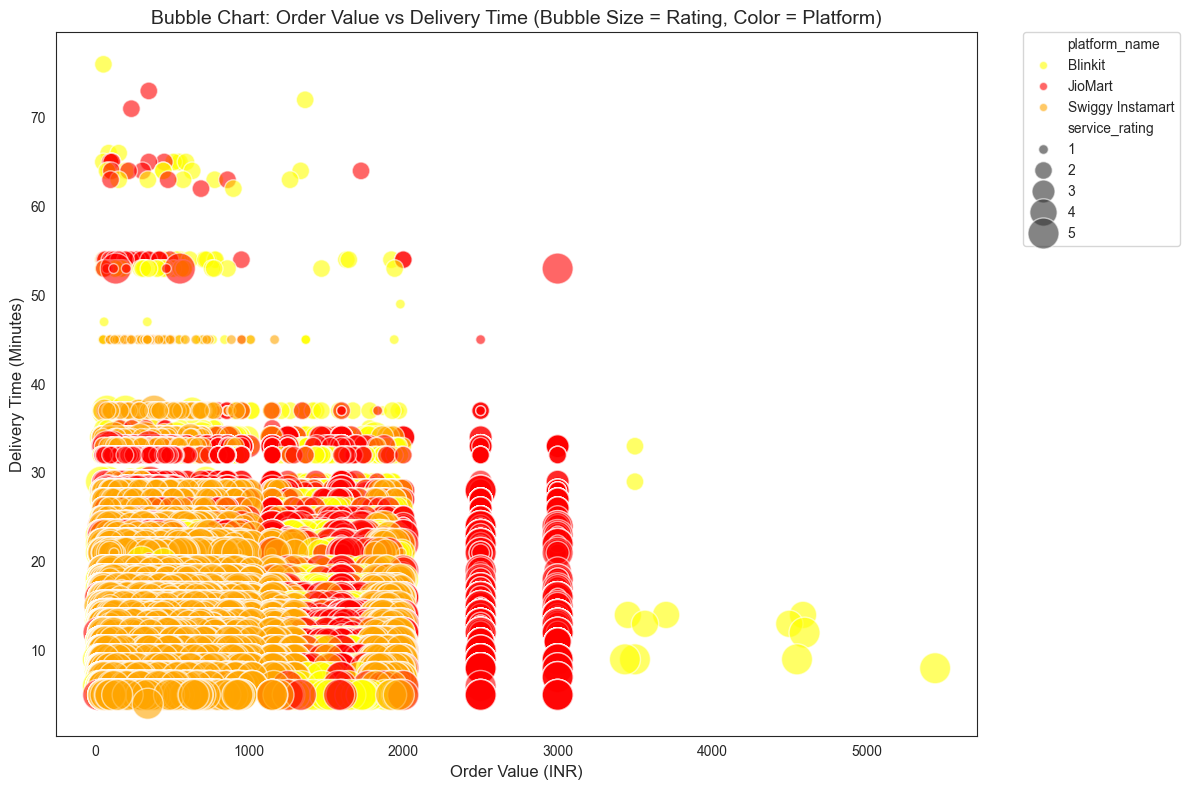

In [33]:
plt.figure(figsize=(12,8))

# Bubble chart
sns.scatterplot(
    data=df,
    x="order_value_inr",
    y="delivery_time_min",
    size="service_rating",       # bubble size
    hue="platform_name",         # bubble color
    sizes=(50, 500),             # min and max bubble size
    alpha=0.6,                   # transparency
    palette={"Blinkit":"yellow", "Swiggy Instamart":"orange", "JioMart":"red"}
)

plt.title("Bubble Chart: Order Value vs Delivery Time (Bubble Size = Rating, Color = Platform)", fontsize=14)
plt.xlabel("Order Value (INR)", fontsize=12)
plt.ylabel("Delivery Time (Minutes)", fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.tight_layout()
plt.show()


In [40]:
df.columns

Index(['order_id', 'customer_id', 'platform_name', 'product_category_id',
       'order_datetime', 'delivery_time_min', 'order_value_inr',
       'delivery_delay', 'refund_requested', 'service_rating',
       'customer_feedback'],
      dtype='object')

In [44]:
rating_platform_product = df.groupby(['platform_name','product_category_id'],as_index=False)['service_rating'].mean().round()
rating_platform_product

,platform_name,product_category_id,service_rating
0,Blinkit,1,4.0
1,Blinkit,2,4.0
2,Blinkit,3,4.0
3,Blinkit,4,4.0
4,Blinkit,5,4.0
5,Blinkit,6,4.0
6,JioMart,1,3.0
7,JioMart,2,3.0
8,JioMart,3,3.0
9,JioMart,4,3.0


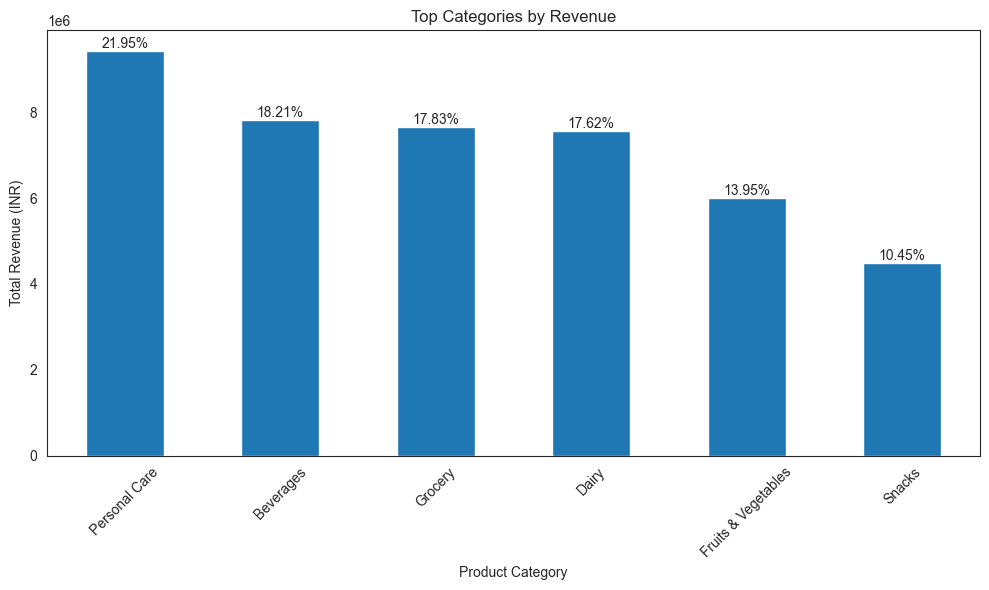

In [51]:
product_category_mapping = {
    1:'Dairy',
    2:'Grocery',
    3:'Snacks',
    4:'Fruits & Vegetables',
    5:'Beverages',
    6:'Personal Care'
}

# Top categories by revenue
cat_revenue = df.groupby('product_category_id')['order_value_inr'].sum().sort_values(ascending=False)

# map product_category_id to category names (on index)
cat_revenue.index = cat_revenue.index.map(product_category_mapping)

# calculate percentages
total_revenue = cat_revenue.sum()
cat_percent = (cat_revenue / total_revenue) * 100

plt.figure(figsize=(10,6))
ax = cat_revenue.plot(kind='bar')

# add percentage labels on bars
for i, c in enumerate(ax.containers[0]):
    ax.text(c.get_x() + c.get_width()/2, c.get_height(), 
            f"{cat_percent.iloc[i]:.2f}%", 
            ha='center', va='bottom', fontsize=10)

plt.title("Top Categories by Revenue")
plt.xlabel("Product Category")
plt.ylabel("Total Revenue (INR)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
